# CS331 - Lab Assignment 3
# Group ID = AyKaGaRo
# Question 7
See this lecture (upto slide 14) https://developers.google.com/machine-learning/crash-course/

classification/video-lecture. Design a bayes classifier (optimal) when p0 = 0.95. Also class condi-
tional densities for class 0 is normal mean 0 and variance 1. For class 1, class conditional density is mean

1 and variance 1.
(a) FP for bayes classifier
(b) TP for bayes classifier
(c) Accuracy
(d) For the same setup implement Neyman Pearson Classifier.
(e) Generate the ROC curve for various thresholds for the family of classifiers which classify based on
likelihood ratio and a threshold as done in Neyman Pearson classifier.
(f) Implement max-min classifier

In [40]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import numpy as np  # Import NumPy library for numerical operations
from scipy.stats import norm  # Import the normal distribution from SciPy library

# (a) FP for bayes classifier

# (b) TP for bayes classifier

# (c) Accuracy

In [41]:
# Define prior probabilities
prior_prob_class_0 = 0.95  # Prior probability of class 0
prior_prob_class_1 = 0.05  # Prior probability of class 1

# Define class conditional densities
class0_distribution = norm(0, 1)  # Normal distribution with mean 0 and standard deviation 1 for class 0
class1_distribution = norm(1, 1)  # Normal distribution with mean 1 and standard deviation 1 for class 1

# Define Bayes classifier function
def bayes_classifier(x):
    # Calculate likelihoods for each class
    likelihood_class_0 = class0_distribution.pdf(x)  # Likelihood of x given class 0
    likelihood_class_1 = class1_distribution.pdf(x)  # Likelihood of x given class 1
    
    # Calculate the marginal likelihood or evidence
    evidence = likelihood_class_0 * prior_prob_class_0 + likelihood_class_1 * prior_prob_class_1  # Marginal likelihood or evidence
    
    # Calculate posterior probabilities
    posterior_prob_class_0 = likelihood_class_0 * prior_prob_class_0 / evidence  # Posterior probability of class 0
    posterior_prob_class_1 = likelihood_class_1 * prior_prob_class_1 / evidence  # Posterior probability of class 1
    
    # Make predictions based on posterior probabilities
    if posterior_prob_class_0 > posterior_prob_class_1:
        return 0  # Predict Class 0
    else:
        return 1  # Predict Class 1

# Generate data
num_samples = 10000  # Number of samples
true_labels = np.random.binomial(1, prior_prob_class_1, num_samples)  # Generate true labels based on binomial distribution with parameter p1
data_points = np.where(true_labels == 0, np.random.normal(0, 1, num_samples), np.random.normal(1, 1, num_samples))  # Generate data points x based on true labels

# False Positive (FP) calculation for Bayes classifier
predicted_labels = np.array([bayes_classifier(xi) for xi in data_points])  # Predict labels for data points x using Bayes classifier

# Calculate False Positives (FP) for Bayes classifier
false_positives = np.sum((true_labels == 0) & (predicted_labels == 1))
print("False Positives Is:", false_positives)

# Calculate True Negatives (TN) for Bayes classifier
true_negatives = np.sum((true_labels == 0) & (predicted_labels == 0))
print("True Negatives Is:", true_negatives)

# Calculate False Negatives (FN) for Bayes classifier
false_negatives = np.sum((true_labels == 1) & (predicted_labels == 0))
print("False Negatives Is:", false_negatives)

# Calculate True Positives (TP) for Bayes classifier
true_positives = np.sum((true_labels == 1) & (predicted_labels == 1))
print("True Positives Is:", true_positives)

# Calculate Accuracy for Bayes classifier
accuracy = np.sum(true_labels == predicted_labels) / len(true_labels)
print("Accuracy Is :", accuracy)


False Positives Is: 0
True Negatives Is: 9493
False Negatives Is: 503
True Positives Is: 4
Accuracy Is : 0.9497


## ---------------------------------------------------------------------------------------
## (d) For the same setup implement Neyman Pearson Classifier.
## ---------------------------------------------------------------------------------------


In [42]:
# Neyman-Pearson classifier function
def neyman_pearson_classifier(x, threshold):
    # Calculate likelihood ratio
    likelihood_ratio = class1_distribution.pdf(x) / class0_distribution.pdf(x)
    
    # Apply thresholding to the likelihood ratio
    likelihood_ratio[likelihood_ratio > threshold] = 1
    likelihood_ratio[likelihood_ratio <= threshold] = 0
    
    return likelihood_ratio

def calculate_threshold(X, y):
    mean_class_0 = np.mean(X[y == 0], axis=0)
    mean_class_1 = np.mean(X[y == 1], axis=0)
    var_class_0 = np.var(X[y == 0], axis=0)
    var_class_1 = np.var(X[y == 1], axis=0)
    # Calculate the threshold value based on the given p0
    z_alpha = norm.ppf(prior_prob_class_0)
    threshold = ((mean_class_1 - mean_class_0) / np.sqrt((var_class_0 + var_class_1) / 2)) * z_alpha + (mean_class_0 + mean_class_1) / 2
    return threshold

# Calculate threshold based on False Positive Rate (FPR)
threshold = calculate_threshold(data_points, true_labels)
print("Threshold:", threshold)


# Calculate threshold based on False Positive Rate (FPR)
threshold = calculate_threshold(data_points, true_labels)
print("Threshold:", threshold)

# Apply Neyman-Pearson classifier with threshold
predicted_labels_np = neyman_pearson_classifier(data_points, threshold)

# Calculate True Positives (TP) for Neyman-Pearson classifier
true_positives_np = np.sum((true_labels == 1) & (predicted_labels_np == 1))
print("True Positives (NP):", true_positives_np)

# Calculate True Negatives (TN) for Neyman-Pearson classifier
true_negatives_np = np.sum((true_labels == 0) & (predicted_labels_np == 0))
print("True Negatives (NP):", true_negatives_np)

# Calculate False Positives (FP) for Neyman-Pearson classifier
false_positives_np = np.sum((true_labels == 0) & (predicted_labels_np == 1))
print("False Positives (NP):", false_positives_np)

# Calculate False Negatives (FN) for Neyman-Pearson classifier
false_negatives_np = np.sum((true_labels == 1) & (predicted_labels_np == 0))
print("False Negatives (NP):", false_negatives_np)

# Calculate Accuracy for Neyman-Pearson classifier
accuracy_np = np.sum(true_labels == predicted_labels_np) / len(true_labels)
print("Accuracy (NP):", accuracy_np)


Threshold: 2.072691065511005
Threshold: 2.072691065511005
True Positives (NP): 0
True Negatives (NP): 9493
False Positives (NP): 0
False Negatives (NP): 507
Accuracy (NP): 0.9493


## ---------------------------------------------------------------------------------------
## (E) Generate the ROC curve for various thresholds for the family of classifiers which classify based on likelihood ratio and a threshold as done in Neyman Pearson classifier.
## ---------------------------------------------------------------------------------------


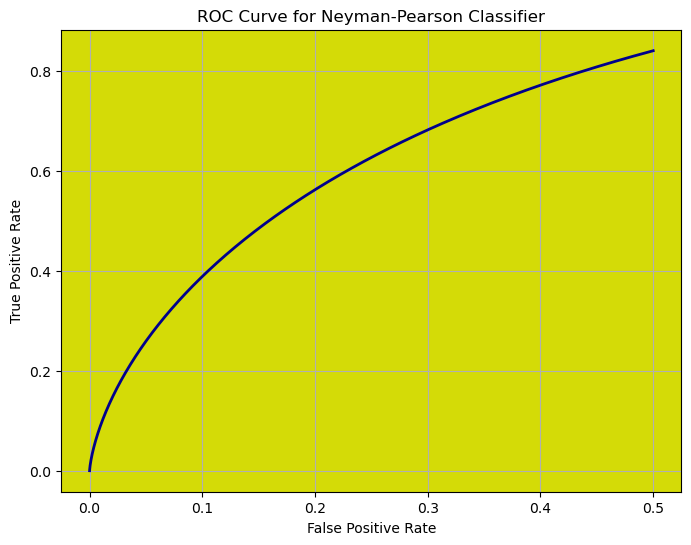

In [43]:
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

# Define prior probabilities and class conditional densities
prior_prob_class_0 = 0.95  # Prior probability of class 0
prior_prob_class_1 = 1 - prior_prob_class_0  # Prior probability of class 1
mean_class_0 = 0  # Mean of class 0
mean_class_1 = 1  # Mean of class 1
std_dev_class_0 = 1  # Standard deviation of class 0
std_dev_class_1 = 1  # Standard deviation of class 1

# Define the range of thresholds to test
thresholds = np.linspace(0, 5, 1000)  # Generate 1000 thresholds between 0 and 5

# Initialize lists to store True Positive Rate (TPR) and False Positive Rate (FPR)
true_positive_rate = []  # True Positive Rate
false_positive_rate = []  # False Positive Rate

# Calculate TPR and FPR for each threshold
for threshold in thresholds:
    # Calculate the likelihood ratio
    likelihood_ratio = norm(mean_class_1, std_dev_class_1).pdf(threshold) / norm(mean_class_0, std_dev_class_0).pdf(threshold)
    
    # Calculate the TPR and FPR
    true_positive_rate.append(1 - norm(mean_class_1, std_dev_class_1).cdf(threshold))  # True Positive Rate
    false_positive_rate.append(1 - norm(mean_class_0, std_dev_class_0).cdf(threshold))  # False Positive Rate

# Plot the ROC curve
plt.figure(figsize=(8, 6))  
plt.plot(false_positive_rate, true_positive_rate, color='darkblue', lw=2)  
plt.title('ROC Curve for Neyman-Pearson Classifier')  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.grid(True)

ax = plt.gca()
ax.set_facecolor('#d4db07')

plt.show()  


## ---------------------------------------------------------------------------------------
## (F) Implement max-min classifier
## ---------------------------------------------------------------------------------------


In [44]:
# Calculate mean and variance for class 0 and class 1
class0_mean, class0_var = norm.fit(data_points[true_labels == 0])  # Mean and variance of class 0
class1_mean, class1_var = norm.fit(data_points[true_labels == 1])  # Mean and variance of class 1

# Define the max-min classifier function
def max_min_classifier(x):
    # Calculate distances from the means of class 0 and class 1
    dist_class0 = np.abs(x - class0_mean)  # Distance from class 0 mean
    dist_class1 = np.abs(x - class1_mean)  # Distance from class 1 mean
    
    # Compare the minimum distances and make predictions
    if np.min(dist_class0) > np.min(dist_class1):
        return 1  # Predict Class 1
    else:
        return 0  # Predict Class 0

# Calculate predicted labels using the max-min classifier
predicted_labels_mm = np.array([max_min_classifier(xi) for xi in data_points])

# Calculate False Positives (FP) for max-min classifier
false_positives_mm = np.sum((true_labels == 0) & (predicted_labels_mm == 1))
print("False Positives (MM):", false_positives_mm)

# Calculate True Positives (TP) for max-min classifier
true_positives_mm = np.sum((true_labels == 1) & (predicted_labels_mm == 1))
print("True Positives (MM):", true_positives_mm)

# Calculate False Negatives (FN) for max-min classifier
false_negatives_mm = np.sum((true_labels == 1) & (predicted_labels_mm == 0))
print("False Negatives (MM):", false_negatives_mm)

# Calculate True Negatives (TN) for max-min classifier
true_negatives_mm = np.sum((true_labels == 0) & (predicted_labels_mm == 0))
print("True Negatives (MM):", true_negatives_mm)

# Calculate Accuracy for max-min classifier
accuracy_mm = np.sum(true_labels == predicted_labels_mm) / len(true_labels)
print("Accuracy (MM):", accuracy_mm)


False Positives (MM): 3037
True Positives (MM): 348
False Negatives (MM): 159
True Negatives (MM): 6456
Accuracy (MM): 0.6804


**Thank you**
